In [1]:
import os
import zipfile
import librosa
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# unzip file dataset
def extract_files(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_file_path = './heart-sound-recordings.zip'
extract_to = './'

extract_files(zip_file_path, extract_to)

In [8]:
old_main_folder = './classification-of-heart-sound-recordings-the-physionet-computing-in-cardiology-challenge-2016-1.0.0'
main_folder = 'heart-sound-recordings'

# rename folder
os.rename(old_main_folder, os.path.join(os.path.dirname(old_main_folder), main_folder))

# print list folder/file di dalam main_folder
file_list = os.listdir(main_folder)
for file in file_list:
    print(file)

figure1.png
mathworks.png
papers
sample2016.zip
sample2016b.zip
sources
training-a
training-b
training-c
training-d
training-e
training-f
training.zip
validation
validation.zip


In [9]:
# cek ada berapa file berekstensi .wav di setiap file training dan file validation yang sudah ada
training_folders = ['training-a', 'training-b', 'training-c', 'training-d', 'training-e', 'training-f']

# Loop melalui setiap folder training
for folder in training_folders:
    folder_path = os.path.join(main_folder, folder)
    wav_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]
    print(f"Jumlah file .wav di {folder}: {len(wav_files)}")

Jumlah file .wav di training-a: 409
Jumlah file .wav di training-b: 490
Jumlah file .wav di training-c: 31
Jumlah file .wav di training-d: 55
Jumlah file .wav di training-e: 2141
Jumlah file .wav di training-f: 114


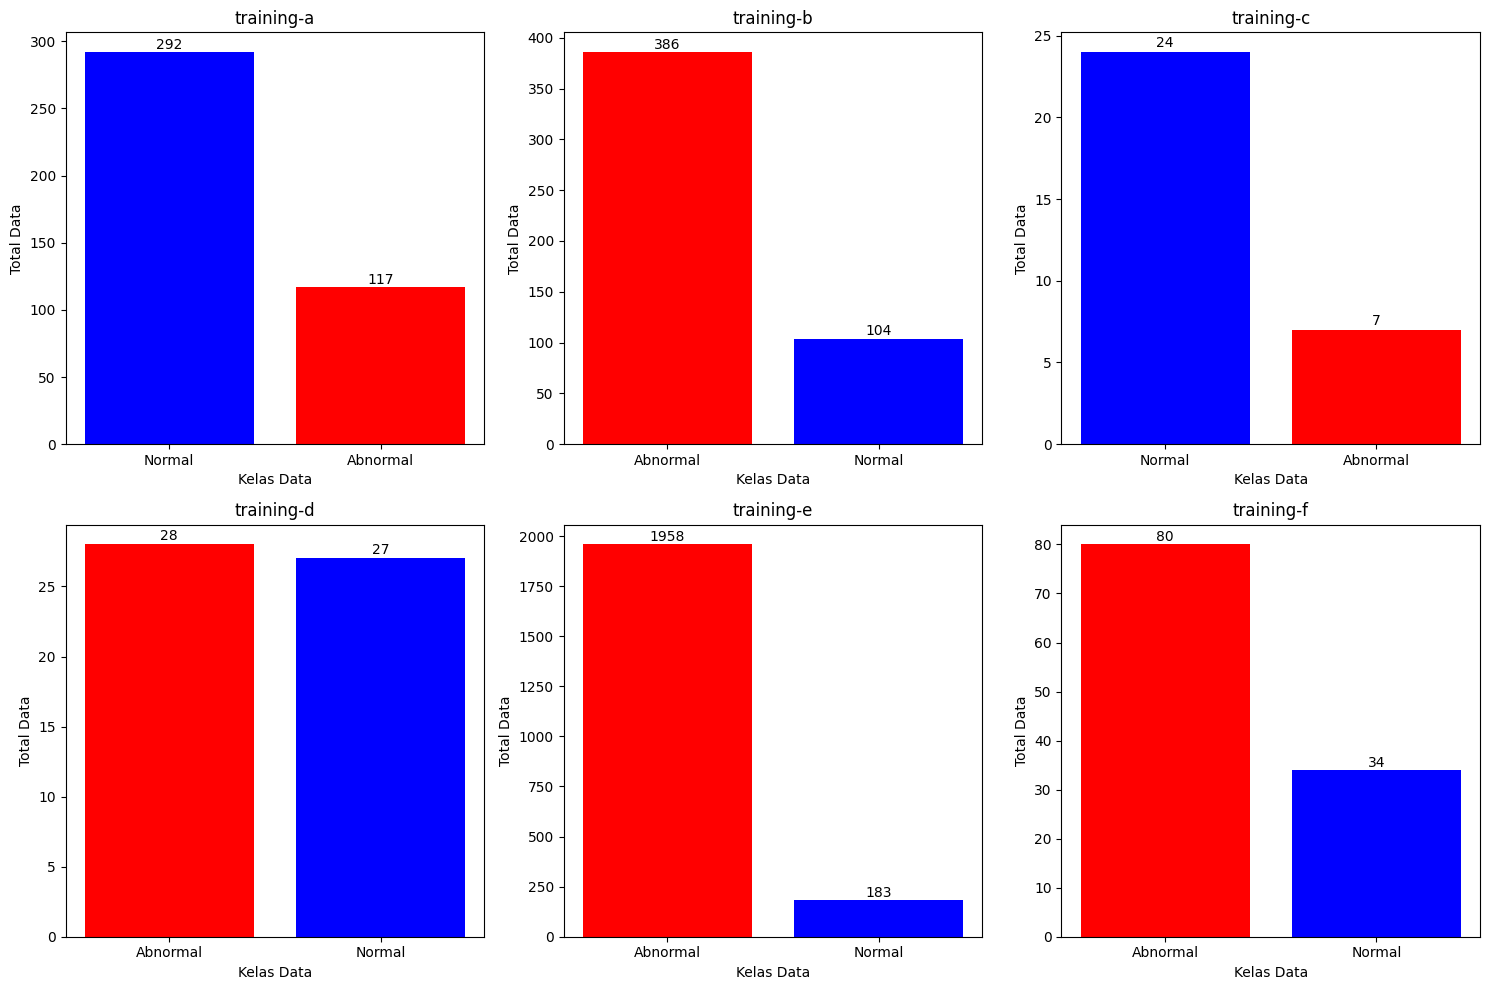

In [28]:

# Fungsi untuk membuat grafik berdasarkan file CSV di setiap folder
def plot_classification_distribution_data(ax, folder_path, folder_name):
    csv_path = os.path.join(folder_path, 'REFERENCE.csv')
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path, header=None)
        labels = df.iloc[:, 1]
        labels.replace({1: 'Normal', -1: 'Abnormal'}, inplace=True)
        label_counts = labels.value_counts()
        color_dict = {'Normal': 'blue', 'Abnormal': 'red'}

        # Plot bars with corresponding colors
        bars = ax.bar(labels.unique(), label_counts, color=[color_dict[label] for label in labels.unique()])
        ax.set_title(folder_name)
        ax.set_xlabel('Kelas Data')
        ax.set_ylabel('Total Data')

        # Menambahkan label jumlah data pada setiap bar
        for bar, v in zip(bars, label_counts):
            ax.text(bar.get_x() + bar.get_width() / 2, v + 0.1, str(v), ha='center', va='bottom')

# Assuming you have defined `training_folders` and `main_folder` elsewhere in your code

# Menghitung jumlah baris dan kolom yang dibutuhkan untuk subplot
num_folders = len(training_folders)
num_rows = num_folders // 3 + (1 if num_folders % 3 != 0 else 0)
num_cols = min(num_folders, 3)

# Buat subplot dengan jumlah baris dan kolom yang sesuai
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop melalui setiap folder training dan buat grafik
for i, folder in enumerate(training_folders):
    folder_path = os.path.join(main_folder, folder)
    plot_classification_distribution_data(axs[i // 3, i % 3 if num_folders > 3 else i], folder_path, folder)

# Menyembunyikan subplot yang tidak terpakai
for j in range(num_folders, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

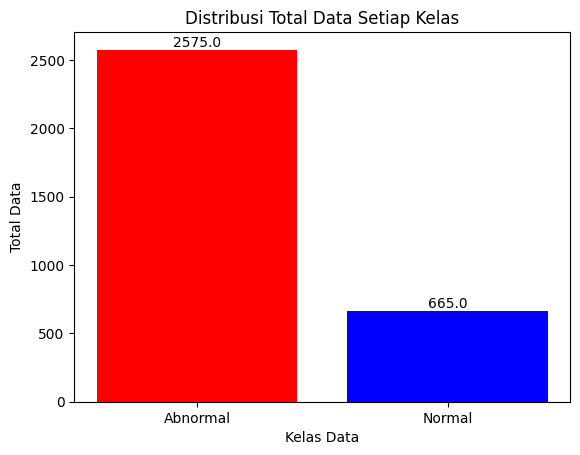

In [29]:
# Fungsi untuk mengumpulkan data dari setiap folder training
def plot_sum_classification_data(folder_path):
    csv_path = os.path.join(folder_path, 'REFERENCE.csv')
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path, header=None)
        labels = df.iloc[:, 1]
        labels.replace({1: 'Normal', -1: 'Abnormal'}, inplace=True)
        label_counts = labels.value_counts()
        return labels, label_counts
    else:
        print(f"File REFERENCE.csv not found in {folder_path}")
        return None

# Mengumpulkan data dari setiap folder training
total_label_counts = pd.Series(dtype=int)
for folder in training_folders:
    folder_path = os.path.join(main_folder, folder)
    labels, label_counts = plot_sum_classification_data(folder_path)
    if label_counts is not None:
        total_label_counts = total_label_counts.add(label_counts, fill_value=0)
        
    color_dict = {'Normal': 'blue', 'Abnormal': 'red'}

# Buat grafik total
plt.bar(labels.unique(), total_label_counts, color=[color_dict[label] for label in labels.unique()])
plt.title('Distribusi Total Data Setiap Kelas')
plt.xlabel('Kelas Data')
plt.ylabel('Total Data')

# Menambahkan label jumlah data pada setiap bar
for i, v in enumerate(total_label_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [21]:
# Fungsi untuk menghitung durasi file audio dalam sebuah folder
def calculate_duration(folder_path):
    durations = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            filepath = os.path.join(folder_path, filename)
            try:
                audio, sr = librosa.load(filepath, sr=None)
                duration = librosa.get_duration(y=audio, sr=sr)
                durations.append(duration)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return durations

# Inisialisasi list untuk menyimpan hasil perhitungan
data = []

# Loop melalui setiap folder training dan menghitung durasi
for folder in training_folders:
    folder_path = os.path.join(main_folder, folder)
    durations = calculate_duration(folder_path)
    
    # Menghitung durasi terpendek, tertinggi, dan rata-rata
    if durations:
        min_duration = min(durations)
        max_duration = max(durations)
        average_duration = sum(durations) / len(durations)
        data.append({
            'Folder': folder,
            'Min Duration': min_duration,
            'Max Duration': max_duration,
            'Average Duration': average_duration
        })
    else:
        print(f"Tidak ada file audio yang ditemukan di folder {folder}")

# Membuat DataFrame dari hasil perhitungan
df = pd.DataFrame(data)
print(df)

       Folder  Min Duration  Max Duration  Average Duration
0  training-a        9.2650       36.5020         32.587061
1  training-b        5.3055        8.0000          7.980062
2  training-c        9.6490      121.9985         49.435016
3  training-d        6.6075       48.5400         15.147691
4  training-e        8.0570      101.6730         23.071797
5  training-f       29.3760       59.6160         33.117675


In [25]:
# Fungsi untuk mengumpulkan durasi file .wav dalam sebuah folder
def durations_by_class_data(folder_path):
    durations = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            filepath = os.path.join(folder_path, filename)
            try:
                audio, sr = librosa.load(filepath, sr=None)
                duration = librosa.get_duration(y=audio, sr=sr)
                durations[os.path.splitext(filename)[0]] = duration
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return durations

# Fungsi untuk membaca klasifikasi dari file REFERENCE.csv di sebuah folder
def read_data_labels(folder_path):
    classifications = {}
    csv_path = os.path.join(folder_path, 'REFERENCE.csv')
    if os.path.exists(csv_path):
        with open(csv_path, 'r') as file:
            for line in file:
                filename, label = line.strip().split(',')
                classifications[os.path.splitext(filename)[0]] = "Normal" if int(label) == 1 else "Abnormal"
    return classifications

# Inisialisasi DataFrame untuk menyimpan durasi dan klasifikasi
df_durations = pd.DataFrame(columns=['File', 'Duration'])

# Loop melalui setiap folder training dan mengumpulkan durasi untuk setiap file .wav
for folder in training_folders:
    folder_path = os.path.join(main_folder, folder)
    wav_durations = durations_by_class_data(folder_path)
    df_temp = pd.DataFrame.from_dict(wav_durations, orient='index', columns=['Duration'])
    df_temp.index.name = 'File'
    df_temp.reset_index(inplace=True)
    df_temp['Folder'] = folder  # Tambahkan kolom 'Folder'
    df_durations = pd.concat([df_durations, df_temp], ignore_index=True)

# Inisialisasi DataFrame untuk menyimpan klasifikasi
df_classifications = pd.DataFrame(columns=['File', 'Label'])

# Loop melalui setiap folder training dan membaca klasifikasi dari file REFERENCE.csv
for folder in training_folders:
    folder_path = os.path.join(main_folder, folder)
    classifications = read_data_labels(folder_path)
    df_temp = pd.DataFrame.from_dict(classifications, orient='index', columns=['Label'])
    df_temp.index.name = 'File'
    df_temp.reset_index(inplace=True)
    df_temp['Folder'] = folder
    df_classifications = pd.concat([df_classifications, df_temp], ignore_index=True)

# Gabungkan DataFrame durasi dan klasifikasi berdasarkan nama file
df_merged = pd.merge(df_durations, df_classifications, on=['File', 'Folder'])  # Gabungkan berdasarkan 'File' dan 'Folder'

# Hitung durasi terpendek, tertinggi, dan rata-rata untuk setiap kelas klasifikasi di setiap folder
df_summary = df_merged.groupby(['Folder', 'Label']).agg(
    Min_Duration=('Duration', 'min'),
    Max_Duration=('Duration', 'max'),
    Average_Duration=('Duration', 'mean')
).reset_index()

print(df_summary)

        Folder     Label  Min_Duration  Max_Duration  Average_Duration
0   training-a  Abnormal        9.2650       36.2930         32.529996
1   training-a    Normal       12.7945       36.5020         32.609926
2   training-b  Abnormal        6.9855        8.0000          7.992227
3   training-b    Normal        5.3055        8.0000          7.934913
4   training-c  Abnormal       16.9655       71.8115         39.441571
5   training-c    Normal        9.6490      121.9985         52.349771
6   training-d  Abnormal        6.6075       29.0770         11.748148
7   training-d    Normal        8.0430       48.5400         18.425821
8   training-e  Abnormal        8.0570      101.6730         23.300596
9   training-e    Normal        8.1270       91.7010         20.623779
10  training-f  Abnormal       29.3760       59.6160         33.322175
11  training-f    Normal       30.0000       42.3360         32.636500


In [26]:
# Filter DataFrame untuk mendapatkan data normal dan abnormal
df_normal = df_summary[df_summary['Label'] == 'Normal']
df_abnormal = df_summary[df_summary['Label'] == 'Abnormal']

# Hitung nilai minimum, maksimum, dan rata-rata untuk normal dan abnormal secara keseluruhan
min_duration_normal = df_normal['Min_Duration'].min()
max_duration_normal = df_normal['Max_Duration'].max()
avg_duration_normal = df_normal['Average_Duration'].mean()

min_duration_abnormal = df_abnormal['Min_Duration'].min()
max_duration_abnormal = df_abnormal['Max_Duration'].max()
avg_duration_abnormal = df_abnormal['Average_Duration'].mean()

# Hitung statistik untuk normal dan abnormal secara keseluruhan
overall_statistics = {
    'Class': ['Normal', 'Abnormal'],
    'Min Duration': [min_duration_normal, min_duration_abnormal],
    'Max Duration': [max_duration_normal, max_duration_abnormal],
    'Average Duration': [avg_duration_normal, avg_duration_abnormal]
}

# Buat DataFrame untuk menyimpan statistik secara keseluruhan
df_overall_statistics = pd.DataFrame(overall_statistics)

print("Statistik Durasi Secara Keseluruhan:")
print(df_overall_statistics)

Statistik Durasi Secara Keseluruhan:
      Class  Min Duration  Max Duration  Average Duration
0    Normal        5.3055      121.9985         27.430118
1  Abnormal        6.6075      101.6730         24.722452
